In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sb

In [2]:
data = pd.read_csv('evaluation_dtc.csv')
data = data[(data['mode'] == '<=') & (data['name'] == 'appendicitis')]

dtc = data['auc']

data = pd.read_csv('evaluation_rfc.csv')
data = data[(data['mode'] == '<=') & (data['name'] == 'appendicitis')]

rfc = data['auc']

data = pd.read_csv('evaluation_dtr.csv')
data = data[(data['mode'] == '<=') & (data['name'] == 'real_estate_valuation')]

dtr = data['r2']

data = pd.read_csv('evaluation_rfr.csv')
data = data[(data['mode'] == '<=') & (data['name'] == 'real_estate_valuation')]

rfr = data['r2']


In [43]:
sb.set(rc={'figure.figsize':(3.5,3.5)})
sb.set_theme(style='white')

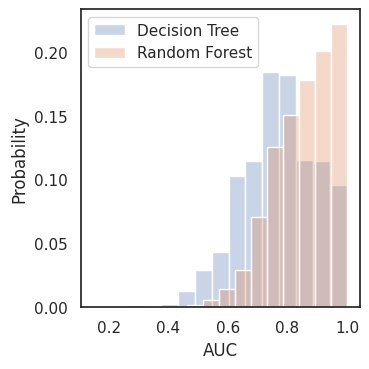

In [48]:
fig, ax = plt.subplots()
sb.histplot(x=dtc, stat='probability', alpha=0.3, bins=15, label='Decision Tree')
sb.histplot(x=rfc, stat='probability', alpha=0.3, bins=15, label='Random Forest')
ax.set_xlabel('AUC')
ax.legend()
ax.set_rasterized(True)
plt.tight_layout(pad=0.01)
plt.savefig('hist-clas.eps', dpi=600)


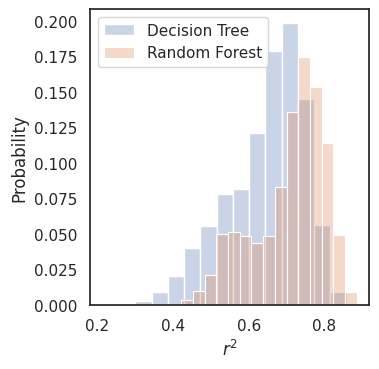

In [49]:
fig, ax = plt.subplots()
sb.histplot(x=dtr, stat='probability', alpha=0.3, bins=15, label='Decision Tree')
sb.histplot(x=rfr, stat='probability', alpha=0.3, bins=15, label='Random Forest')
ax.set_xlabel('$r^2$')
ax.legend()
ax.set_rasterized(True)
plt.tight_layout(pad=0.01)
plt.savefig('hist-reg.eps', dpi=600)

<Axes: xlabel='auc', ylabel='Probability'>

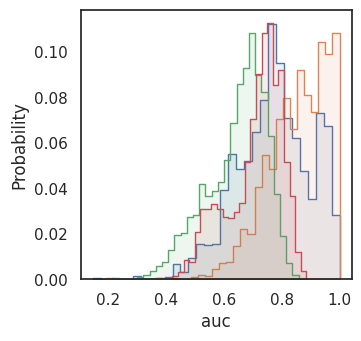

In [46]:
sb.histplot(x=dtc, stat='probability', alpha=0.1, element='step')
sb.histplot(x=rfc, stat='probability', alpha=0.1, element='step')
sb.histplot(x=dtr, stat='probability', alpha=0.1, element='step')
sb.histplot(x=rfr, stat='probability', alpha=0.1, element='step')

In [40]:
tmp = pd.DataFrame({'dtc': dtc, 'dtr': dtr, 'rfc': rfc, 'rfr': rfr})

In [41]:
tmp = tmp.melt()

In [44]:
px.histogram(tmp, histnorm='probability', opacity=0.25, color='variable')

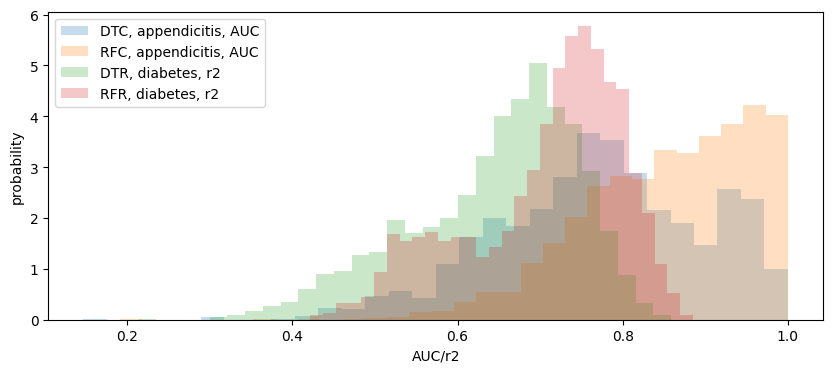

In [24]:
plt.figure(figsize=(10, 4))
plt.hist(dtc, alpha=0.25, label='DTC, appendicitis, AUC', density=1, bins=30, stacked=True)
plt.hist(rfc, alpha=0.25, label='RFC, appendicitis, AUC', density=1, bins=30, stacked=True)
plt.hist(dtr, alpha=0.25, label='DTR, diabetes, r2', density=1, bins=30, stacked=True)
plt.hist(rfr, alpha=0.25, label='RFR, diabetes, r2', density=1, bins=30, stacked=True)
plt.xlabel('AUC/r2')
plt.ylabel('probability')
plt.legend()